In [61]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()

df['pop'] = [2,3,6,8,11]

n = 2

first_value = []
second_value = []
for index1 in range(df['pop'].shape[0]):
    for index2 in range(df['pop'].shape[0]):
        if(index1!=index2):
            first_value.append(df.loc[index1]['pop'])
            second_value.append(df.loc[index2]['pop'])
echantillon_df = pd.DataFrame({'first_value':first_value,'second_value':second_value})
echantillon_df

,first_value,second_value
0,2,3
1,2,6
2,2,8
3,2,11
4,3,2
5,3,6
6,3,8
7,3,11
8,6,2
9,6,3


In [62]:
moyenne_population = df['pop'].mean()
moyenne_population

np.float64(6.0)

In [63]:
deltas = df['pop'] - moyenne_population

variance = np.dot(deltas, deltas) / len(df['pop'])
np.sqrt(variance)

np.float64(3.286335345030997)

In [64]:
echantillon_df['moyenne'] = echantillon_df.mean(axis=1)

echantillon_df

,first_value,second_value,moyenne
0,2,3,2.5
1,2,6,4.0
2,2,8,5.0
3,2,11,6.5
4,3,2,2.5
5,3,6,4.5
6,3,8,5.5
7,3,11,7.0
8,6,2,4.0
9,6,3,4.5


In [65]:
# Moyenne de la distribution des moyennes
mean_echantillon = echantillon_df['moyenne'].mean()
mean_echantillon

np.float64(6.0)

In [66]:
# Ecart-type de la distribution des moyennes
echantillon_df['delta'] = echantillon_df['moyenne'] - mean_echantillon

variance_echantillon = np.dot(echantillon_df['delta'], echantillon_df['delta']) / len(echantillon_df['moyenne'])
np.sqrt(variance_echantillon)

np.float64(2.0124611797498106)

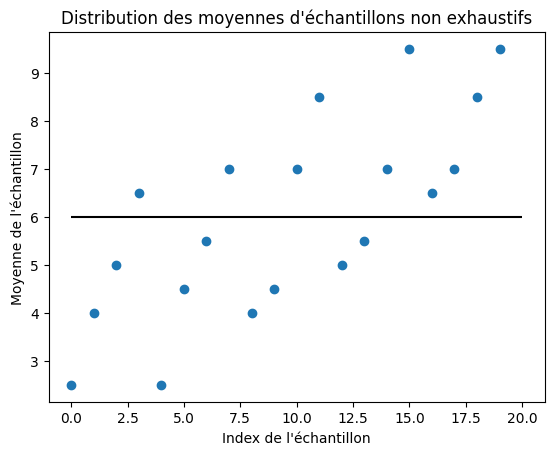

In [67]:
plt.scatter(echantillon_df.index, echantillon_df['moyenne'])
plt.hlines(xmin=0, xmax=len(echantillon_df.index), y=mean_echantillon, color='black', linestyle='-')
plt.title("Distribution des moyennes d'échantillons non exhaustifs")
plt.xlabel("Index de l'échantillon")
plt.ylabel("Moyenne de l'échantillon")
plt.show()

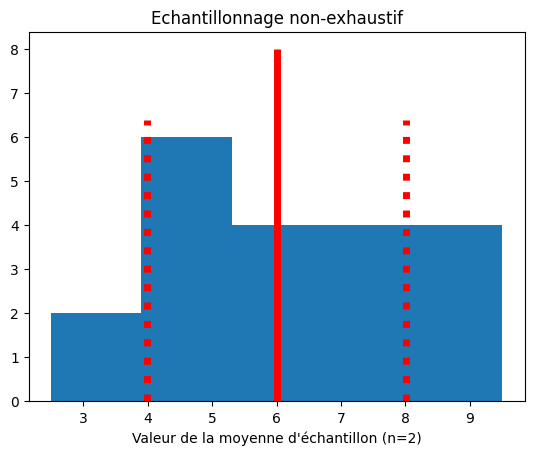

In [68]:
plt.hist(echantillon_df['moyenne'], bins=5)
plt.xlabel("Valeur de la moyenne d'échantillon (n=2)")

ymin = 0
ymax = 8
color = 'red'
linewidth = 5
plt.vlines(x=np.mean(echantillon_df['moyenne']),ymin=ymin,ymax=ymax,color=color,linewidth=linewidth)
plt.vlines(x=np.mean(echantillon_df['moyenne'])+np.std(echantillon_df['moyenne']),ymin=ymin,ymax=0.8*ymax,color=color,linewidth=linewidth,linestyles='dotted')
plt.vlines(x=np.mean(echantillon_df['moyenne'])-np.std(echantillon_df['moyenne']),ymin=ymin,ymax=0.8*ymax,color=color,linewidth=linewidth,linestyles='dotted')

plt.title('Echantillonnage non-exhaustif')
plt.show()